In [41]:
from tqdm import tqdm
import pandas as pd
from collections import Counter
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("answers.csv")

# df = df[["id", "text", "languag

df.views.value_counts()

df.text.iloc[0]

'The person that makes me feel at home is my daughter'

---
## remove prefixes

In [119]:
word_lists = df.text.str.split()

word_lists.apply(lambda ls: ls[:10]).value_counts().iloc[:20]

KeyboardInterrupt: 

In [115]:
df.text.apply(lambda s: s[:20]).value_counts().iloc[:16]

text
Der Mensch, der für     996
Meine Heimat fühlt s    987
Ich mache mir um mei    945
Die Landschaft, die     933
So habe ich meine ne    550
Meine Heimat riecht     437
Heimat finde ich in     396
Das Symbol, das in m    387
Die Menschen, die fü    357
Mein Heimatort ist d    288
Mein Heimatort ist H    278
Mein Heimatort ist .    245
Meine Heimat schmeck    229
Heimat ist für mich     153
Die Nationalhymne er    139
Ich bin heimatlos, w    138
Name: count, dtype: int64

In [66]:
class TFIDF:
    def __init__(self, texts):
        self.clean_texts = texts.apply(lambda s: ''.join([i if ord(i) < 128 else '' for i in s]))
        word_lists = self.clean_texts.str.lower().str.split()
        self.tf = Counter(w for ls in word_lists for w in ls)
        doc_f = {}
        for w, c in tqdm(self.tf.most_common()):
            if c > 1:
                doc_f[w] = int(word_lists.apply(lambda ls: w in ls).sum())
            else:
                doc_f[w] = 1
        self.tf = pd.Series(self.tf).sort_index()
        self.doc_f = pd.Series(doc_f).sort_index()
        self.data = pd.concat([self.tf, self.doc_f], axis=1)
        self.data.columns = ["tf", "doc_f"]


In [67]:
tfidf = TFIDF(df.text)

100%|███████████████████████████████████████████████████████████| 14925/14925 [00:53<00:00, 279.50it/s]


In [86]:
tfidf.data[~(tfidf.data.tf == tfidf.data.doc_f)]

x = tfidf.data.tf*np.log2(len(df.text)/tfidf.data.doc_f)

x.sort_values()


KeyError: "['leln'] not in index"

In [76]:
df.text[df.text.str.contains("Lavendelfeld")].iloc[0]

"Die Landschaft, in mir Heimatgefühle weckt, ist ...ein Lavendelfeld an der Güte d'azur"

In [81]:
tfidf.tf.loc["die"], tfidf.doc_f.loc["die"]

(np.int64(5439), np.int64(3352))

In [51]:
vocab = pd.Series(sorted(set(w for ls in tfidf.clean_texts.str.lower().str.split() for w in ls)))

vocab.sample(10)

11016         schutz.
14169    wiedersehen,
4023           events
4888         geachtet
13809            weg,
9269             neun
12888          untere
13397    vertrautheit
5041           gefllt
6043          happily
dtype: object

In [31]:
df.text[df.text.str.contains("≠")].iloc[0]

'Der Begriff „Heimat“ wird zu oft von Nazis als das beschützen der „Kultur“ verstanden und das ist falsch! Heimat ist für jeden Menschen der Planet Erde. Kein Mensch ist illegal! Heimat ≠ Kultur'

---
## playground

In [22]:
feel = "feel | fühl | smell | riech | mean | bedeut | taste | schmeck "

feel_matches = df[df.text.str.lower().str.contains(feel, regex=True)]
print(f"{len(feel_matches)=}")
feel_matches.sample(1).text.iloc[0]

where = "where | wo | Ort"
where_matches = df[df.text.str.lower().str.contains(where, regex=True)]
print(f"{len(where_matches)=}")


len(feel_matches)=329
len(where_matches)=674


In [32]:
df[(~df.text.str.lower().str.contains(feel, regex=True)) & 
    (~df.text.str.lower().str.contains(where, regex=True))].sample(1).text.iloc[0]

'Ich mache mir um meine Heimat Sorgen, weil die Natur so starkt zerzört wird und ich Angst habe, dass wir diesen Prozess nicht mehr ausreichend stoppen können.'

In [15]:
df.sample(1).text.iloc[0]

'Meine Heimat schmeckt nach Erdbeeren'

In [97]:
start = df.sample(1).iloc[0]
words = start.text.split()

word_matches = df.


def candidates(c):
    words = c.text.split()
    word_matches = df[df.apply(

id                                                                      5069
text                       Der Mensch, der für mich Heimat bedeutet, ist ...
score                                                                      0
views                                                                      1
language_question                                                         de
language_guessed_answer                                                   de
placeholder                                                              NaN
area_id                                                                    2
choice_id                                                                  0
subchoice_id                                                             NaN
user_name                                                               Lion
user_place                                                         Stuttgart
time_created                                             2021-09-23 15:34:25

In [104]:
df[~(df.language_question == df.language_guessed_answer)]

,id,text,score,views,language_question,language_guessed_answer,placeholder,area_id,choice_id,subchoice_id,user_name,user_place,time_created,time_updated
19,20,The place where I feel at home is dkjlfkjslkfj...,-10,1,en,NaN,NaN,1,1,NaN,NaN,NaN,2021-05-29 15:29:36,2021-06-02 11:26:48
42,43,Meine Heimat riecht nach nassem Asphalt,20,5090,de,NaN,NaN,3,1,NaN,Viviane,Lörrach,2021-05-30 12:38:53,2022-01-12 06:15:39
63,64,Wien,-10,528,de,fy,NaN,1,1,NaN,Seppi,Wien,2021-05-30 13:28:44,2021-06-07 15:53:39
91,92,My home sounds like Motown music on the radio.,30,5089,en,NaN,NaN,3,2,NaN,Erika Pinner,"Georgia, USA",2021-05-31 15:19:41,2022-01-12 09:17:57
111,112,test,-10,1,de,NaN,NaN,7,0,NaN,NaN,NaN,2021-06-01 10:47:21,2021-06-02 11:30:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11082,11083,Mein Heimatort ist Kuhlenfeld,0,1,de,NaN,NaN,1,1,NaN,Enrico,Seit 2001 Hamburg davor Kuhlenfeld,2022-01-09 14:51:31,2022-01-09 14:51:56
11149,11150,Meine Heimat fühlt sich an wie Heimat,0,1,de,lb,NaN,3,3,NaN,NaN,NaN,2022-01-09 15:59:19,2022-01-09 15:59:48
11159,11160,Mein Heimatort ist Gombori,0,1,de,NaN,NaN,1,1,NaN,NaN,NaN,2022-01-09 16:13:22,2022-01-09 16:13:38
11161,11162,"Heimat fühlt sich dort nach Heimat an, wo man ...",0,1,de,NaN,NaN,2,2,NaN,Eva,NaN,2022-01-09 16:13:34,2022-01-09 16:13:58


<Axes: >

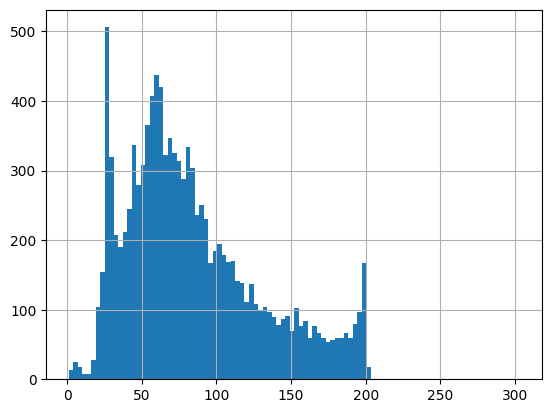

In [102]:
df.text.apply(len).hist(bins=100)

---

In [33]:
vocab = Counter(w for ls in df.text.str.split() for w in ls)

# plt.loglog(sorted(vocab.values()), ".")

In [37]:
vocab.most_common()[50:60]

[('wo', 526),
 ('Familie', 521),
 ('dem', 492),
 ('es', 490),
 ('von', 472),
 ('riecht', 469),
 ('I', 461),
 ('bin', 444),
 ('mein', 435),
 ('wenn', 432)]

In [74]:
tail = {w: c for w, c in vocab.most_common() if 1 < c < 10 and len(w) > 5}
tail = set(tail.keys())

words = df.text.str.split()
tail_words = words.apply(lambda ls: set(ls) & tail)

In [104]:
(tail_words.apply(len) == 0).sum()

np.int64(5508)

In [112]:
df[(tail_words.apply(len) == 0)].sample(1).text.iloc[0]

'Die Landschaft, die in mir Heimatgefühle weckt, ist Norddeutschland '